In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head()

,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82


In [3]:
malli = ExponentialSmoothing(df['CO2'], seasonal_periods=12, 
                            trend='add', seasonal='mul').fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


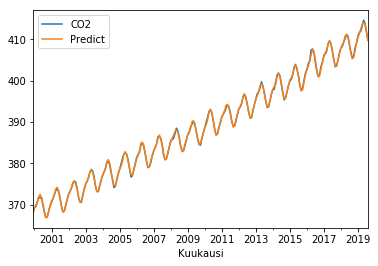

In [4]:
df['Predict'] = malli.fittedvalues

df.plot()

In [5]:
sqrt(mean_squared_error(df['CO2'], df['Predict']))

0.30786567591684627

In [6]:
mean_absolute_error(df['CO2'], df['Predict'])

0.23981828651612727

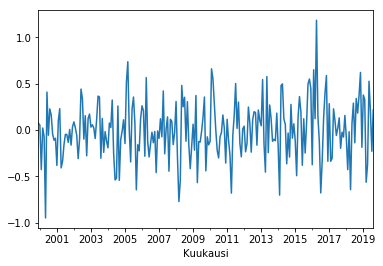

In [7]:
df['Resid'] = malli.resid

df['Resid'].plot()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


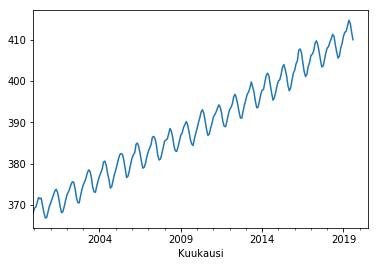

In [8]:
index = pd.date_range('2019-08-01', periods=12, freq='M')

datap = pd.DataFrame(malli.forecast(12), index=index)

datap.columns = ['Predict']

df['CO2'].plot()

datap['Predict'].plot()

In [9]:
datap

,Predict
2019-08-31,NaN
2019-09-30,NaN
2019-10-31,NaN
2019-11-30,NaN
2019-12-31,NaN
2020-01-31,NaN
2020-02-29,NaN
2020-03-31,NaN
2020-04-30,NaN
2020-05-31,NaN
